<a href="https://colab.research.google.com/github/wawan-ikhwan/InHospital/blob/master/run_once_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Mendefinisikan Fungsi `run_once`
from IPython.core.magic import register_cell_magic
from IPython.display import display, HTML
from google.colab import output as __output
from hashlib import sha1
import time
import os

@register_cell_magic
def run_once(__line: str, __cell: str):
  """
  This is a custom cell magic command in order to prevent multiple runs, so the cell must be run once for every runtime.
  If the cell has already run before, then it will display the history output.
  Usage: %%run_once
  """
  try:

    # Argument of this magic cell is specifying tracker directory
    __tracker_dir = __line
    if len(__tracker_dir) == 0:
      __tracker_dir = './.run_once' # Set default if not specified.

    # Create input-output tracker directory
    if not os.path.exists(__tracker_dir):
      os.makedirs(__tracker_dir)

    # Get cell id by cell changes with SHA-1 as identifier
    __cell_id = sha1(__cell.encode('utf-8')).hexdigest()

    # Check wether __cell_id.html already exists. (Imply the cell already run)
    if os.path.exists(f'{__tracker_dir}/{__cell_id}.html'):
      with open(f'{__tracker_dir}/{__cell_id}.html', 'r') as __file_cell_output:
        __html_output = __file_cell_output.read()
      __last_created = time.strftime('%Y-%m-%d %H:%M:%S UTC+00', time.gmtime(os.path.getctime(f'{__tracker_dir}/{__cell_id}.html')))
      print(f'This cell ({__cell_id}) already ran before, last run was:', __last_created, ', displaying history output:\n')
      display(HTML(__html_output))
      return # Don't do any computation

    # Actual compute
    get_ipython().run_cell(__cell)

    # After code has executed, it will contains some output. Save it!
    __html_output = __output.eval_js('document.getElementById("output-area").innerHTML;')
    with open(f'{__tracker_dir}/{__cell_id}.html', 'w') as __file_cell_output:
      __file_cell_output.write(__html_output)

    # Also save the cell code for archive purpose
    with open(f'{__tracker_dir}/{__cell_id}.cell.py', 'w') as __file_cell_input:
      __file_cell_input.write(__cell)

  except Exception as e:
    print(f"run_once error: {str(e)}")

In [2]:
#@title This is the first run.
%%run_once

print("This is an example of cell that shouldn't be called multiple times.")

This is an example of cell that shouldn't be called multiple times.


In [ ]:
!cat /content/.run_once/3aed7f752fe840ed566a68933570b91bc663bdcd.html

<span id="output-header"> </span><div id="output-body"></div><span id="output-footer"></span>

In [3]:
#@title This is the second run.
%%run_once

print("This is an example of cell that shouldn't be called multiple times.")

This cell (3aed7f752fe840ed566a68933570b91bc663bdcd) already ran before, last run was: 2024-01-14 23:08:41 UTC+00 , displaying history output:



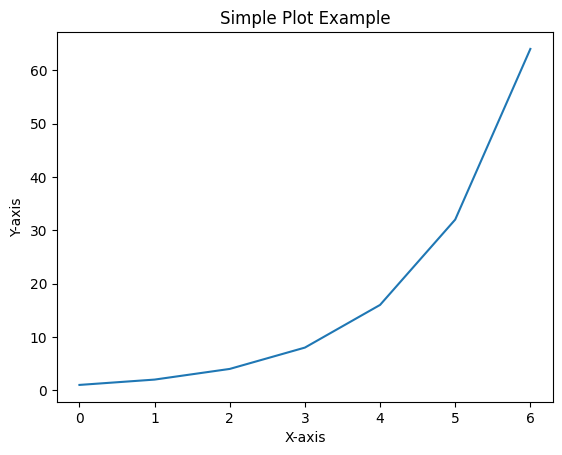

In [ ]:
#@title First Run Matplotlib
%%run_once
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 8, 16, 32, 64])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot Example')
plt.show()

This cell (a1391dcb36e0c4222814ed4f3dafea8bb8566078) already ran before, last run was: 2024-01-14 15:21:13 UTC+00 , displaying history output...




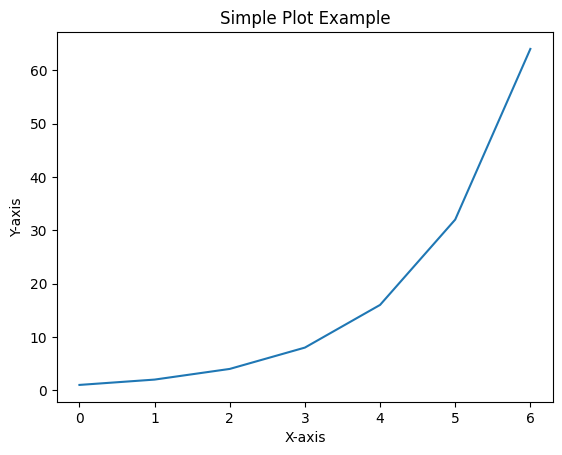

In [ ]:
#@title Second Run Matplotlib
%%run_once
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 8, 16, 32, 64])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot Example')
plt.show()

In [ ]:
#@title First Run Pandas
%%run_once drive/MyDrive/run_once
import pandas as pd

# Creating a DataFrame from the dictionary
df = pd.DataFrame({
  'Column1': [1, 2, 3],
  'Column2': ['A', 'B', 'C'],
  'Column3': [True, False, True]
})

# Displaying the DataFrame
display(df)

,Column1,Column2,Column3
0,1,A,True
1,2,B,False
2,3,C,True


In [ ]:
#@title Second Run Pandas
%%run_once drive/MyDrive/run_once
import pandas as pd

# Creating a DataFrame from the dictionary
df = pd.DataFrame({
  'Column1': [1, 2, 3],
  'Column2': ['A', 'B', 'C'],
  'Column3': [True, False, True]
})

# Displaying the DataFrame
display(df)

This cell (92b6c663d535b4f8e56cd3e6701024639ed67bf4) already ran before, last run was: 2024-01-14 15:25:17 UTC+00 , displaying history output...



,Column1,Column2,Column3
0,1,A,True
1,2,B,False
2,3,C,True
